# Data Analysis - Philadelphia's Daily Temperature

In [1]:
# This line configures matplotlib to show figures embedded in the notebook
%matplotlib inline

In this notebook we will go through a complete example of how to use python to perform some simple data analysis. We are looking at the daily High and Low temperature in Philadelphia from Jan 1, 1950 through Dec 31, 1999. The data itself was taken from the NOAA website. I have cleaned up the files received from the NOAA for the purposes of this minisketch.

The data file is available in 3 slightly different formats.

1. `data/phl_temperature_noheaders.txt` - Plain text file with the data in columns that are space separated 
2. `data/phl_temperature.xlsx` - Data in a Microsoft excel file format    

Let us quickly look at the plain text file and its format. We open the file using the `open` command which takes the name of the file and a mode as arguments. The mode can either be 'r' for reading a file or 'w' for writing a file.

There are several ways to read text data from text files. You can read a file one chatacter at a time using the `read()` method, until you run into a end of file character. 

A more convenient way to read the data is to read the file one line at a time using the `readline()` method. Lets read the first 10 lines of our file using this method.

In [2]:
f = open('data/phl_temperature_noheaders.txt','r')
for i in range(10):
    line = f.readline()
    print(line)

1    1    1950    45   32

1    2    1950    55   37

1    3    1950    60   44

1    4    1950    68   57

1    5    1950    64   52

1    6    1950    71   50

1    7    1950    65   32

1    8    1950    33   22

1    9    1950    46   23

1    10   1950    63   41



Does that look right? The `readline` method reads each line from the file and includes the newline '\n' character and the `print` function automatically appends a newline character as well, which is why the lines are double spaced. We can get rid of the newline character in the lines that are read by using the `strip` method.

In [3]:
for i in range(10):
    line = f.readline().strip()
    print(line)
f.close()

1    11   1950    61   29
1    12   1950    36   26
1    13   1950    50   35
1    14   1950    61   39
1    15   1950    44   31
1    16   1950    50   35
1    17   1950    40   27
1    18   1950    52   32
1    19   1950    36   23
1    20   1950    32   20


Note that since we did not close the file or reset the file handle to the start of the file, the second time we used the readline method it continued from where it left off. The file is closed using the `close` method.

Read the file content into a numpy array the long way

In [4]:
import numpy 

# Open the file 
f = open('data/phl_temperature_noheaders.txt','r')

# Read all the lines into a list. Each line will be one entry in the list
content = f.readlines()

# Close the file since we do not need it anymore 
f.close()

# Loop through and convert the string content to numbers
data = []
for i in content:
    a = []
    for j in i.split():
        a.append(int(j))
    data.append(a)

# Print some stuff
data = numpy.array(data)
print(type(data))
print(data.shape)
print(data[0])

<class 'numpy.ndarray'>
(18300, 5)
[   1    1 1950   45   32]


In [5]:
# The one line fancy version of reading the data file using list comprehensions
data2 = numpy.array([ [int(i) for i in line.split()] for line in open('data/phl_temperature_noheaders.txt').readlines() ])
print(type(data2))
print(data2.shape)
print(data2[0])

<class 'numpy.ndarray'>
(18300, 5)
[   1    1 1950   45   32]


Now that the data is available in the form of a numpy array, we can use the slicing methods to extract subsets of data. Note that all the temperatures entries for Feb 29 in non leap years is meaningless. So when we do further analysis, we need to account for this. Here are a few examples.

In [6]:
# The daily high temperature stored in the 4th column of the file
daily_high = data[:,3]

# The daily low temperature stored in the 5th column of the file
daily_low = data[:,4]

# Leap year
def check_notleapyear(year):
    """Check if a year is a leap year
    
    Check if a year is a leap year. If year is an array then it 
    returns an array of boolean leap year.
    
    Parameters
    ----------
    year : array_like
        array of years
   
    Returns
    -------
    out : numpy array
        an array of boolean leap year, or array of number of days

    """
    import numpy
    if not isinstance(year, (tuple, numpy.ndarray, list)):
        year = [year]
    mask400 = [(i % 400) == 0 for i in year]   
    mask100 = [(i % 100) == 0 for i in year ]  
    mask4   = [(i % 4) == 0 for i in year ]   
    ans = [ not bool(((a[0] | a[2]) & (~a[1] | a[0]))) for a in zip(mask400, mask100, mask4)]
    if len(ans) == 1:
        return ans[0]
    else:
        return ans

# Convert temperatures
def ftoc(tf):
    """Convert an array of tempertures from fahrenheit to celsius
    
    Parameters
    ----------
    tf: numpy.ndarray
        Array of temperatures in Farenheit
        
    Returns
    -------
    tc: numpy.ndarray
        Array of temperatures in Celsius
        
    """
    return (tf-32.0)*5.0/9.0

def ctof(tc):
    """Convert an array of tempertures from celsius to fahrenheit
    
    Parameters
    ----------
    tc: numpy.ndarray
        Array of temperatures in Celsius
        
    Returns
    -------
    tf: numpy.ndarray
        Array of temperatures in Farenheit
        
    """
    return (9.0/5.0)*tc + 32.0


# Temperatures on Feb 29th
# feb29 = numpy.where(((data[:,0] == 2) & (data[:,1]==29) & check_notleapyear(data[:,2].astype(int))))
feb29 = numpy.where(numpy.logical_and.reduce(((data[:,0] == 2),(data[:,1]==29),check_notleapyear(data[:,2].astype(int)))))

print(data[feb29])
data_new = numpy.delete(data,feb29,axis=0)
print(data_new)
highs = data_new[:,3]
lows = data_new[:,4]

[[   2   29 1950 -999 -999]
 [   2   29 1951 -999 -999]
 [   2   29 1953 -999 -999]
 [   2   29 1954 -999 -999]
 [   2   29 1955 -999 -999]
 [   2   29 1957 -999 -999]
 [   2   29 1958 -999 -999]
 [   2   29 1959 -999 -999]
 [   2   29 1961 -999 -999]
 [   2   29 1962 -999 -999]
 [   2   29 1963 -999 -999]
 [   2   29 1965 -999 -999]
 [   2   29 1966 -999 -999]
 [   2   29 1967 -999 -999]
 [   2   29 1969 -999 -999]
 [   2   29 1970 -999 -999]
 [   2   29 1971 -999 -999]
 [   2   29 1973 -999 -999]
 [   2   29 1974 -999 -999]
 [   2   29 1975 -999 -999]
 [   2   29 1977 -999 -999]
 [   2   29 1978 -999 -999]
 [   2   29 1979 -999 -999]
 [   2   29 1981 -999 -999]
 [   2   29 1982 -999 -999]
 [   2   29 1983 -999 -999]
 [   2   29 1985 -999 -999]
 [   2   29 1986 -999 -999]
 [   2   29 1987 -999 -999]
 [   2   29 1989 -999 -999]
 [   2   29 1990 -999 -999]
 [   2   29 1991 -999 -999]
 [   2   29 1993 -999 -999]
 [   2   29 1994 -999 -999]
 [   2   29 1995 -999 -999]
 [   2   29 1997 -99

Some simple analysis that can be performed.

* The maximum and minimum recorded temperature between 1950 and 1999
* Calculate the average daily high and low temperatures.
* The difference between the high and low temperatures for each day from 1 Jan 1950 to 31 Dec 1999. 
* Statistics of the daily difference between the low and high (check out numpy.histogram)
* The "day-wise" highest and lowest temperatures, i.e. the highest and lowest recorded temperature on January 1 in the 49 years of data and which year were they recorded. Similarly for January 2, January 3 etc.
* The "day-wise" average high and low temperatures, i.e.  average high on Jan 1, average high on Jan 2, ...etc.


(0, 85)

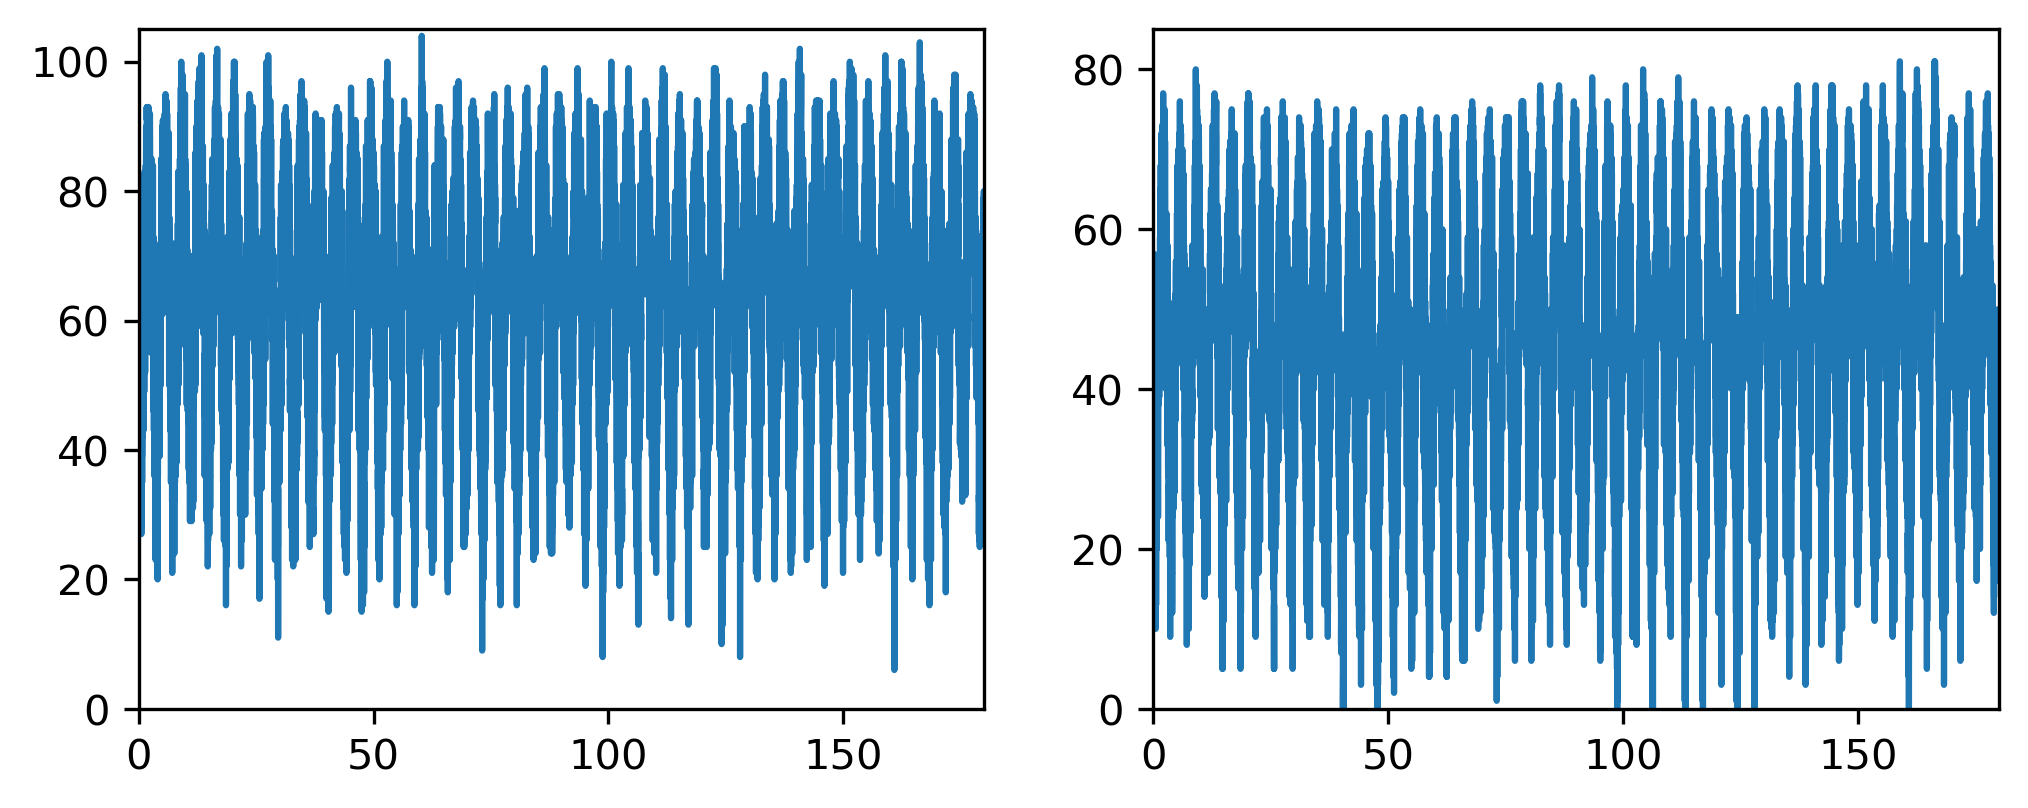

In [8]:
# Plot the entire data set
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Plot the data
fig = plt.figure(figsize=(8,3),dpi=300)
gs = gridspec.GridSpec(1,2)
ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[0,1])

# Generate fake data
x = np.arange(len(highs))

# Plot 
ax1.plot(x/100,highs)
ax2.plot(x/100,lows)
xmin = 0
xmax = 180
ax1.set_xlim([xmin,xmax])
ax1.set_ylim([0,105])
ax2.set_xlim([xmin,xmax])
ax2.set_ylim([0,85])

In [11]:
# Compute the daily average high and low
print(data2.shape)

# Reshape the array
daily_highs = data.reshape(18300//366,366*5)[:,3::5]
daily_lows = data.reshape(18300//366,366*5)[:,4::5]

daily_mean_highs = np.mean(daily_highs,axis=0)
daily_mean_lows = np.mean(daily_lows,axis=0)

# Fix the Feb 29 entries
# Use the numpy masked arrays package
import numpy.ma as ma
daily_highs = ma.masked_outside(data.reshape(18300//366,366*5)[:,3::5],-100,150)
daily_lows = ma.masked_outside(data.reshape(18300//366,366*5)[:,4::5],-100,150)
daily_mean_highs = ma.mean(daily_highs,axis=0)
daily_mean_lows = ma.mean(daily_lows,axis=0)

(18300, 5)


Text(0.5, 0, 'Day')

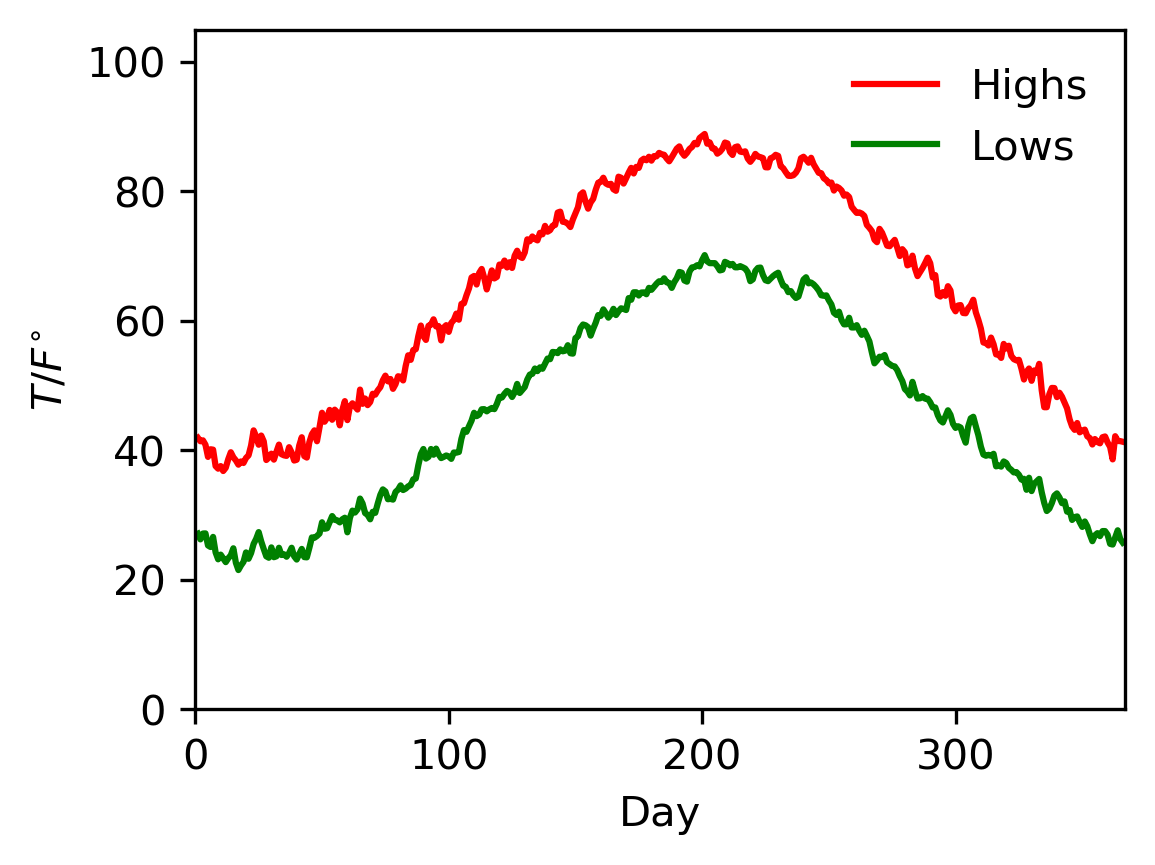

In [12]:
# Plot the entire data set
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Set some fonts and other settings

# Plot the data
fig = plt.figure(figsize=(4,3),dpi=300)
gs = gridspec.GridSpec(1,1)
ax1 = plt.subplot(gs[0,0])

# Generate fake data
x = np.arange(1,367)

# Plot 
ax1.plot(x,daily_mean_highs, color='r', lw=1.5, label='Highs')
ax1.plot(x,daily_mean_lows,  color='g', lw=1.5, label='Lows')
ax1.legend(loc="upper right",frameon=False, prop={'size':10})
ax1.set_xlim([0,367])
ax1.set_ylim([0,105])
ax1.set_ylabel('$T / F^{\circ}$')
ax1.set_xlabel('Day')


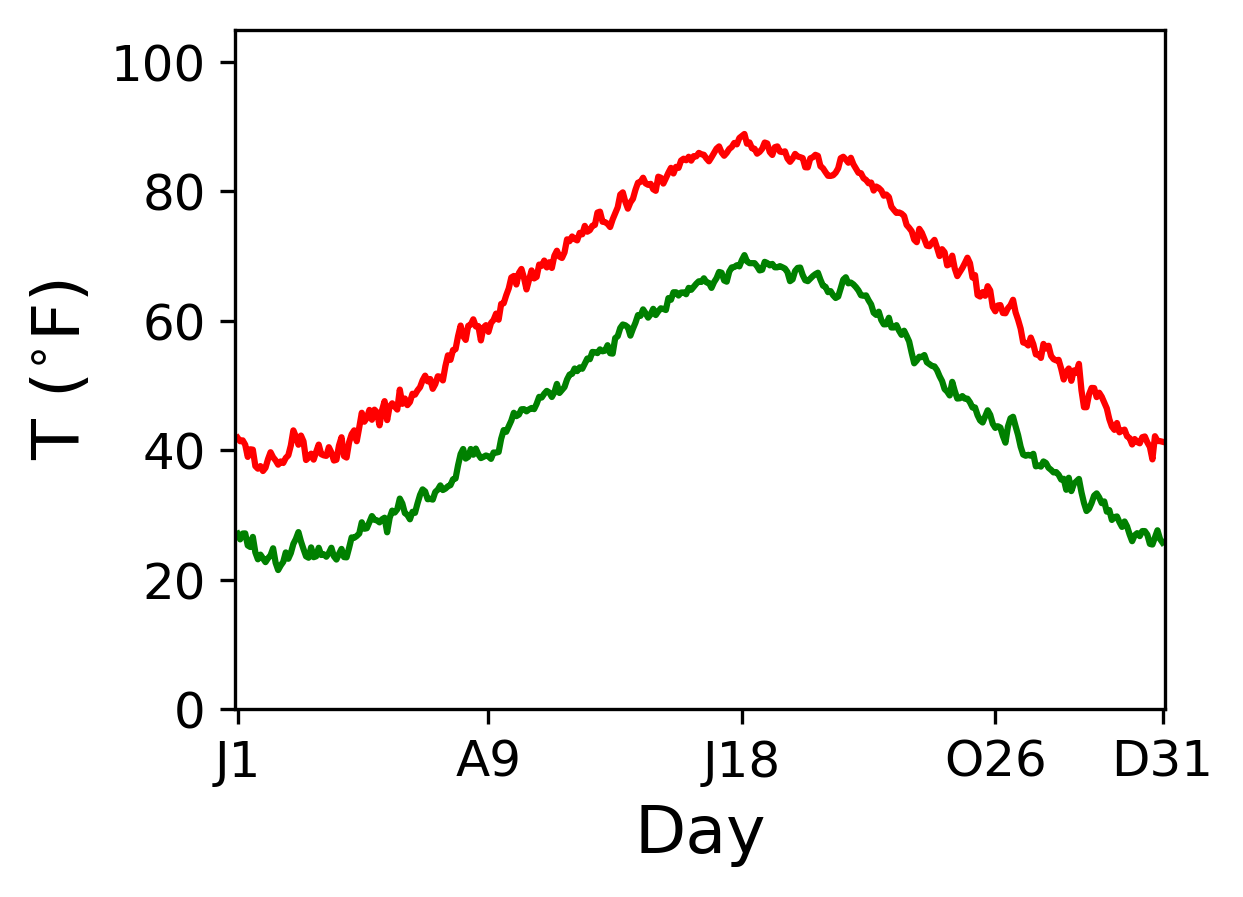

In [13]:
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt

def fdate(x):
    """Return the day of the year in MMDD format
    
    Parameters
    ----------
    x: list
        Number of days since Jan 1
        
    Returns
    -------
    f: list
        Date in MMDD format - e.g. J24 for January 24
    """
    if not isinstance(x, (tuple, numpy.ndarray, list)):
        t = [t]
    f = []
    for i in x:
        t = datetime.date(2000, 1, 1) + datetime.timedelta(i-1)
        m = t.strftime('%b')[0]
        d = t.timetuple().tm_mday
        f.append(m+str(d))
    return f

# Set fonts
fontprops = {'family':'sans-serif','style':'normal', 'size':12}
mpl.rc('font', **fontprops)

# Create the figure and axis
fig = plt.figure(figsize=(4,3),dpi=300)
gs = gridspec.GridSpec(1,1)
ax1 = plt.subplot(gs[0,0])

# Set the xaxis ticks
x = np.arange(1,367)
xtics = [1, 100, 200, 300, 366]
xlabs = fdate(xtics)

# Plot 
ax1.plot(x,daily_mean_highs, color='r', lw=1.5, label='Highs')
ax1.plot(x,daily_mean_lows,  color='g', lw=1.5, label='Lows')
ax1.set_xlim([0,367])
ax1.set_ylim([0,105])
ax1.set_ylabel('T ($^{\circ}$F)',fontsize=16)
ax1.set_xlabel('Day',fontsize=16)
ax1.set_xticks(xtics)
ax1xlabs = ax1.set_xticklabels(xlabs)

[ 24.13013194  -0.9530532  -17.44983236  62.75631237]


Text(0.5, 0, 'Day')

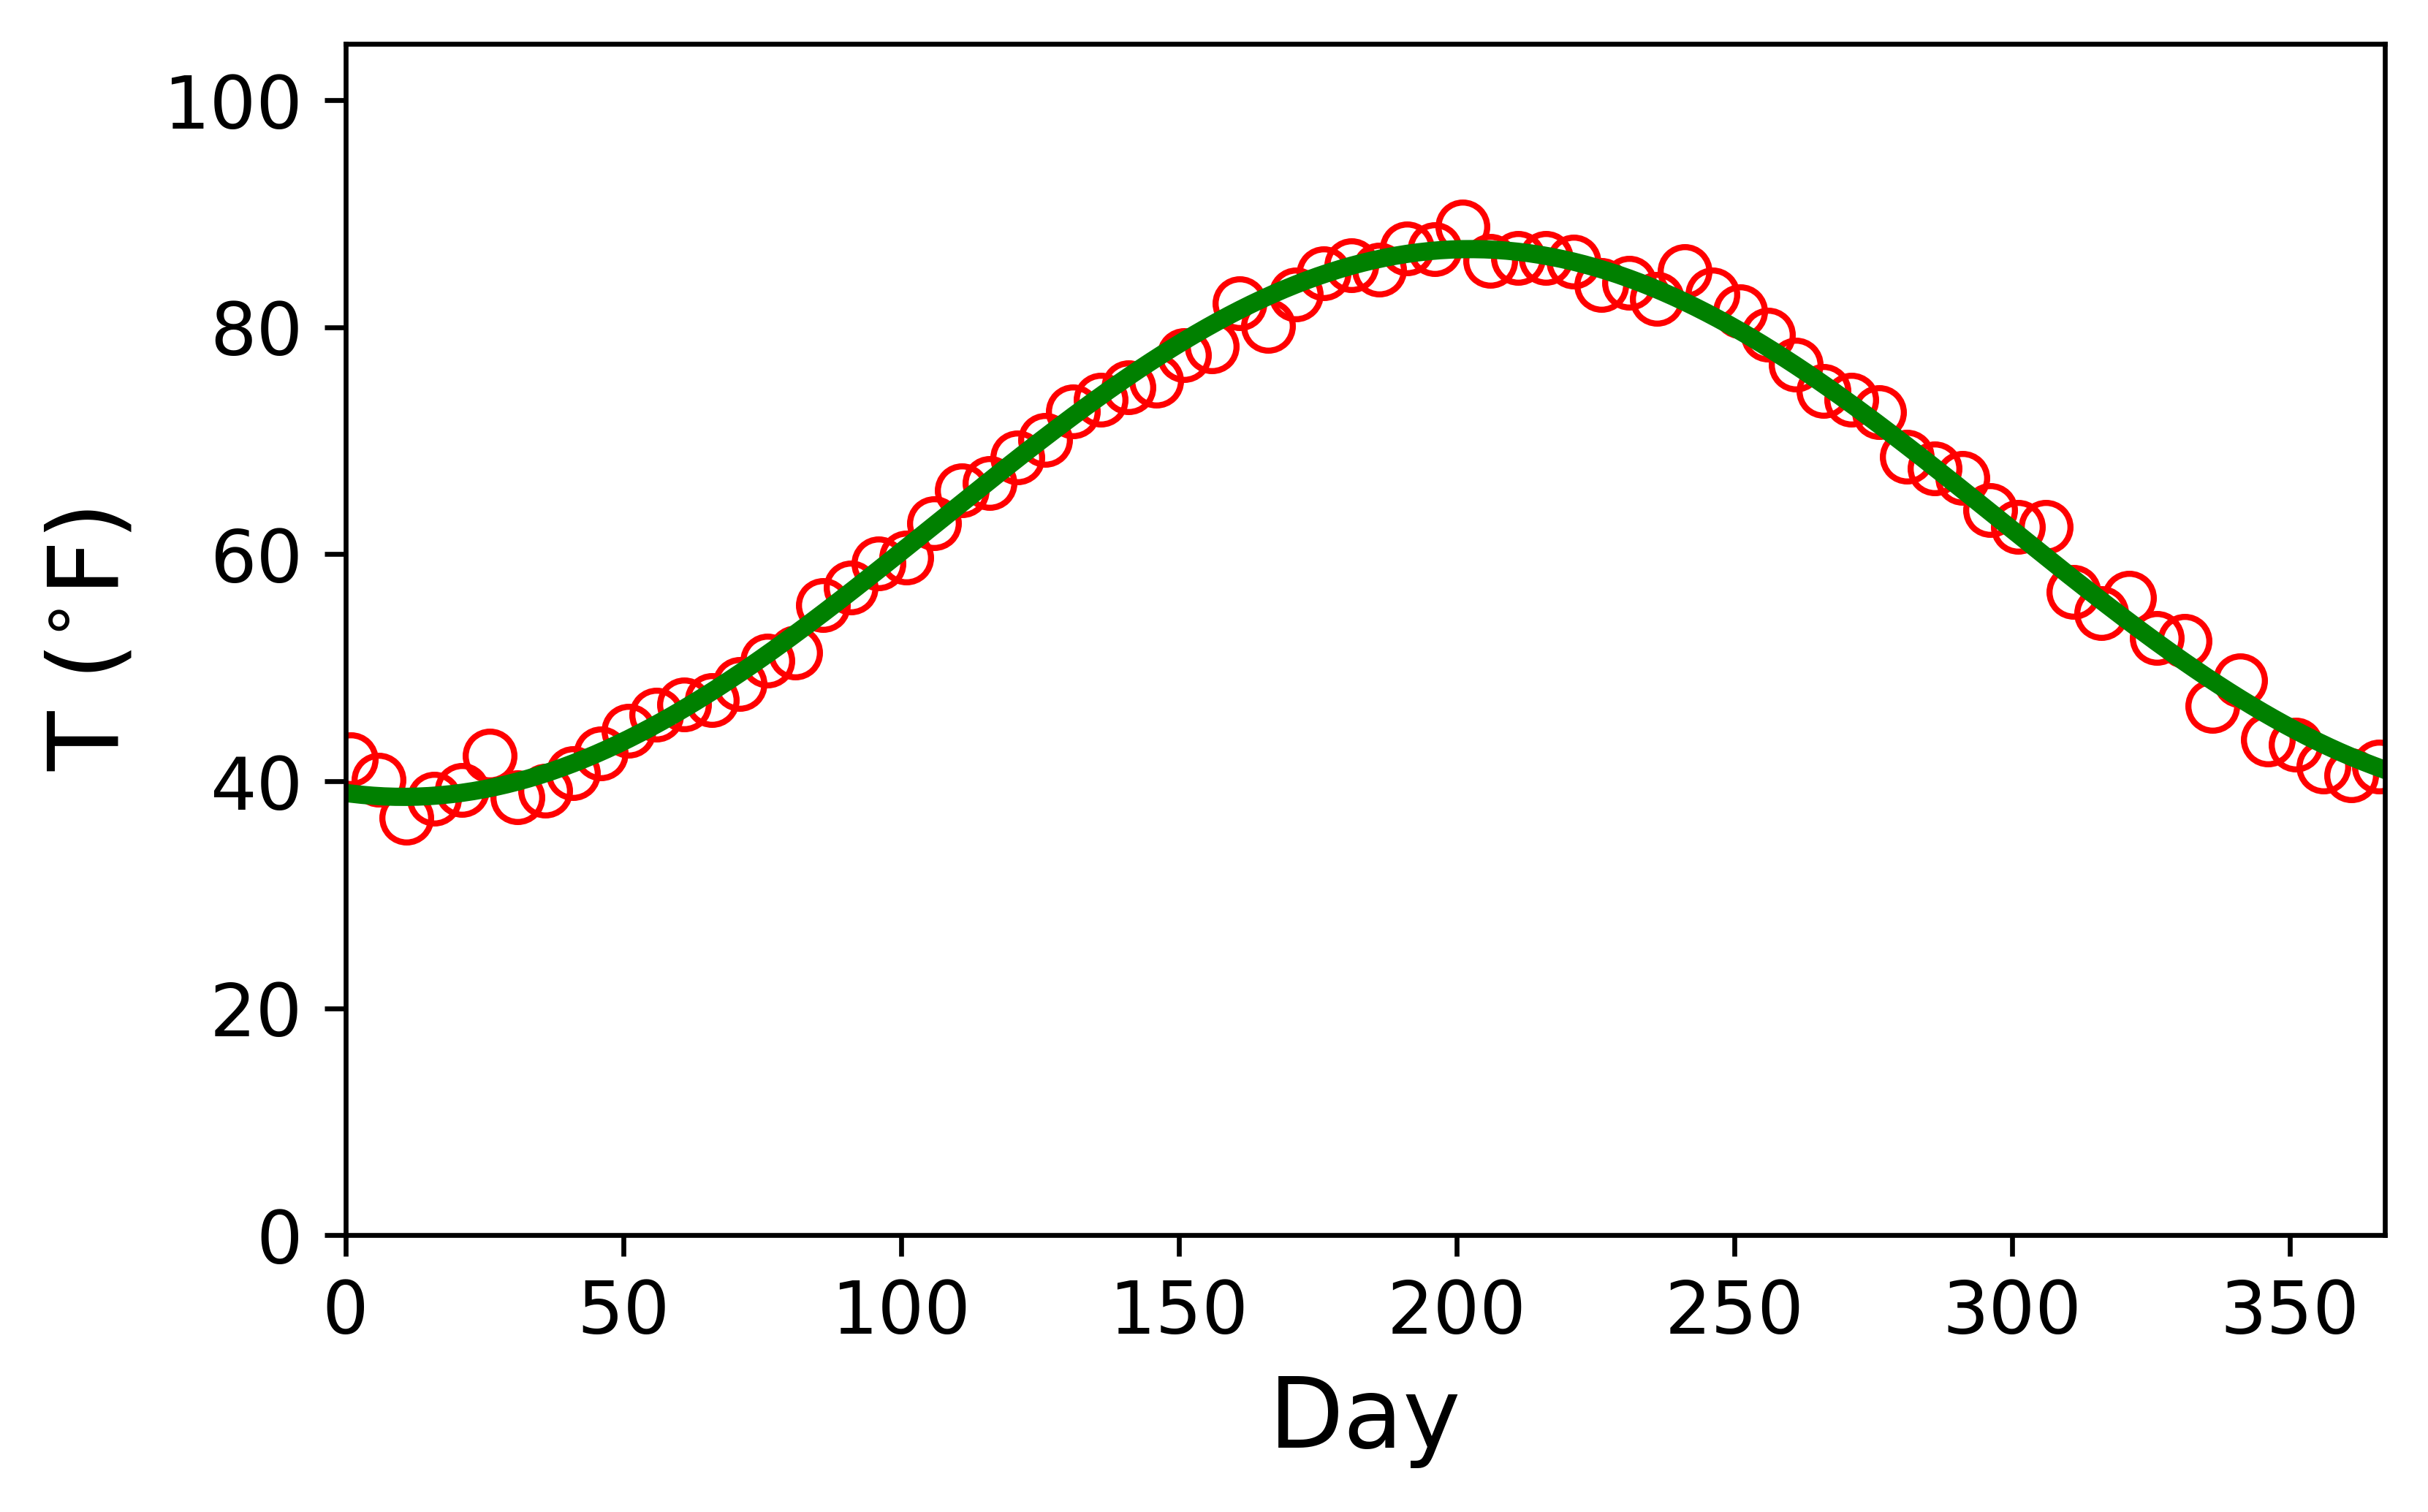

In [15]:
# Fit the data
import scipy.optimize

def fit_func_tdata(x,a,b,c,d):
    """Sine fitting function"""
    return a*numpy.sin(2*numpy.pi*b*x/366.0-c)+d

xt = numpy.arange(len(daily_mean_highs))
y = daily_mean_highs
fitparams, fitcovariance = scipy.optimize.curve_fit(fit_func_tdata,xt,y,p0 = [40.0,1.0/366,1.0,1.0])
print(fitparams)

fig = plt.figure(figsize=(6,3.6),dpi=600)
gs = gridspec.GridSpec(1,1)
ax1 = plt.subplot(gs[0,0])

# Plot 
ax1.plot(x[::5],y[::5], ls='none',marker='o', mfc='none', mec='r', ms=8, mew=1, label='Highs')
ax1.plot(x,fit_func_tdata(x,fitparams[0],fitparams[1],fitparams[2],fitparams[3]), color='g', lw=3)
ax1.set_xlim([0,367])
ax1.set_ylim([0,105])
ax1.set_ylabel('T ($^{\circ}$F)',fontsize=16)
ax1.set_xlabel('Day',fontsize=16)